# Статистический анализ для сервиса аренды самокатов GoFast

### Цель исследования 

 - проанализировать данные и проверить гипотезы, которые могут помочь бизнесу вырасти.  


    - Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. 
    
    
        Сервисом можно пользоваться:
        * без подписки
        * абонентская плата отсутствует;
        * стоимость одной минуты поездки — 8 рублей;
        * стоимость старта (начала поездки) — 50 рублей;

        С подпиской Ultra
        * абонентская плата — 199 рублей в месяц;
        * стоимость одной минуты поездки — 6 рублей;
        * стоимость старта — бесплатно.
     

### Общий вывод
- пользователи с платной подпиской не являются более выгодными для компании, потому что выручка будет сопоставима: пользователи без подписки ездят больше и дольше, их минута и стартовый взнос - дороже, соответственно, они принесут больше денег, но они больше влияют на износ самокатов, чем пользователи с подпиской. 

# Описание данных

**Пользователи — `/datasets/users_go.csv`**

* user_id — уникальный идентификатор пользователя
* name — имя пользователя
* age — возраст
* city — город
* subscription_type — тип подписки (free, ultra)


**Поeздки —  `/datasets/rides_go.csv`**

* user_id — уникальный идентификатор пользователя
* distance — расстояние, которое пользователь проехал в текущей сессии (в метрах)
* duration — продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
* date — дата совершения поездки


**Подписки — `/datasets/subscriptions_go.csv.csv`**
* subscription_type — тип подписки
* minute_price — стоимость одной минуты поездки по данной подписке
* start_ride_price — стоимость начала поездки
* subscription_fee — стоимость ежемесячного платежа

### Инструменты
* pandas, matplotlib, numpy, scipy, seaborn

# Импорт библиотек и загрузка файлов с данными


In [1]:
# загрузка библиотек
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns

pd.options.display.max_columns = 20

### Загрузка данных 

### Пользователи

In [2]:
#загрузим и изучим данные о пользователях 
users = pd.read_csv('/datasets/users_go.csv')
display(users)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
...,...,...,...,...,...
1560,829,Федор,29,Пятигорск,free
1561,809,Юрий,26,Сочи,free
1562,307,Ясмина,19,Краснодар,ultra
1563,47,Юрий,28,Тюмень,ultra


In [3]:
#посмотрим общую информацию
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


Тип данных не нарушен

### Поездки


In [4]:
#загрузим и изучим данные о поездках 
rides = pd.read_csv('/datasets/rides_go.csv')
display(rides)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04
18064,1534,2840.423057,21.409799,2021-11-16
18065,1534,3826.185507,18.435051,2021-11-18
18066,1534,2902.308661,16.674362,2021-11-27


In [5]:
#посмотрим общую информацию
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


Нарушен тип данных date, нужно привести к формату datetime

In [6]:
rides.describe()

,user_id,distance,duration
count,18068.000000,18068.000000,18068.000000
mean,842.869936,3070.659976,17.805011
std,434.734317,1116.831209,6.091051
min,1.000000,0.855683,0.500000
25%,487.000000,2543.226360,13.597563
50%,889.000000,3133.609994,17.678395
75%,1213.250000,3776.222735,21.724800
max,1534.000000,7211.007745,40.823963


### Подписки


In [7]:
#загрузим и изучим данные о подписках 
subs = pd.read_csv('/datasets/subscriptions_go.csv')
display(subs)

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [8]:
subs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


Тип данных не нарушен

## Предобработка данных

### Пользователи

In [9]:
#проверим данные о пользователях на наличие явных дубликатов
users.duplicated().sum()

31

In [10]:
# удалим дубликаты
users.drop_duplicates(keep='first', inplace=True)
users.reset_index(drop=True)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
...,...,...,...,...,...
1529,1530,Ростислав,29,Сочи,free
1530,1531,Никита,25,Пятигорск,free
1531,1532,Алексей,26,Тюмень,free
1532,1533,Степан,22,Краснодар,free


In [11]:
#проверим пропуски
users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

Пропусков нет

### Поездки

#### Приведем столбец date к нужному типу

In [12]:
rides['date'] = pd.to_datetime(rides['date'], format = '%Y-%m-%d')
rides['date'].sample(5)

11797   2021-04-26
7734    2021-11-21
5105    2021-05-26
8265    2021-01-29
7762    2021-06-22
Name: date, dtype: datetime64[ns]

In [13]:
#проверим на дубликаты
rides.duplicated().sum()

0

In [14]:
#проверим пропуски
rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
dtype: int64

Пропусков нет

#### Создадим новый столбец с номером месяца

Проверим, за какой период представлены данные

In [15]:
rides['date'].dt.year.unique()

array([2021])

Данные представлены за один год, ошибок не будет

In [16]:
rides['month'] = rides['date'].dt.month
rides['month'].sample(5)

17935    6
16028    2
17666    9
11368    1
12033    7
Name: month, dtype: int32

In [17]:
# посмотрим минимум и максимум 
print(rides['date'].min())
print(rides['date'].max())

2021-01-01 00:00:00
2021-12-30 00:00:00


### Вывод
**Пользователи:** найдены дубликаты, они были удалены


**Поездки:** исправлен формат столбца 'date'

Пропуски не обнаружены

Добавлен столбец с номером месяца.

## Исследовательский анализ данных

### Изучим распределение пользователей по городам

In [18]:
users['city'].value_counts()

city
Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: count, dtype: int64

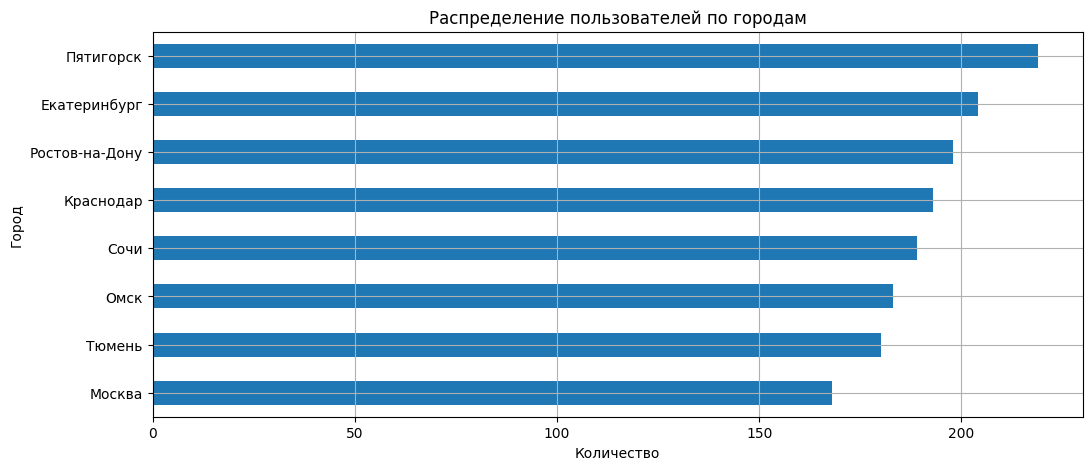

In [19]:
#посмотрим распределение по городам
users['city'].value_counts(ascending = True).plot(
    kind = 'barh', 
    y = users['city'],
    figsize=(12,5),
    grid=True,
    title = 'Распределение пользователей по городам')
plt.ylabel('Город')
plt.xlabel('Количество')
plt.show()

Пользователи распределены по 8 городам: Краснодар, Ростов-на-Дону, Екатеринбург, Пятигорск, Москва, Тюмень, Омск, Сочи. Процентное соотношение городов распределено равномерно, 11-14% от общего количества. Города распределены равномерно по территории России. Наибольшее количество пользователей из Пятигорска, наименьшее - из Москвы.

### Изучим распределение по подпискам

In [20]:
users['subscription_type'].value_counts()

subscription_type
free     835
ultra    699
Name: count, dtype: int64

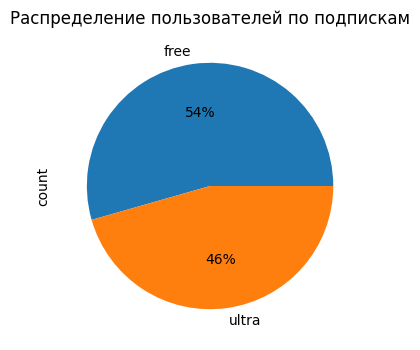

In [21]:
users['subscription_type'].value_counts().plot(
    kind = 'pie', 
    y = users['subscription_type'],
    autopct = '%1.0f%%',
    figsize=(4,4), 
    title = 'Распределение пользователей по подпискам');



Распределение бесплатных и платных подписок почти равно, однако большинство пользователей предпоситает бесплатную подписку. Бесплатной подпиской пользуются 835 пользователей, платной - 699 (54% против 46%).

#### Изучим распределение платных подписок по городам

In [22]:
users_grouped = users.groupby(['user_id'])[['city', 'subscription_type']].apply(sum).sort_values(by='subscription_type', ascending=True)
users_ultra_query = users_grouped.query('subscription_type == "ultra"')
ultra_group = users_ultra_query.groupby('city')['subscription_type'].count().sort_values(ascending=False)
display(ultra_group)

city
Пятигорск         94
Екатеринбург      92
Омск              91
Ростов-на-Дону    89
Сочи              86
Москва            84
Тюмень            82
Краснодар         81
Name: subscription_type, dtype: int64

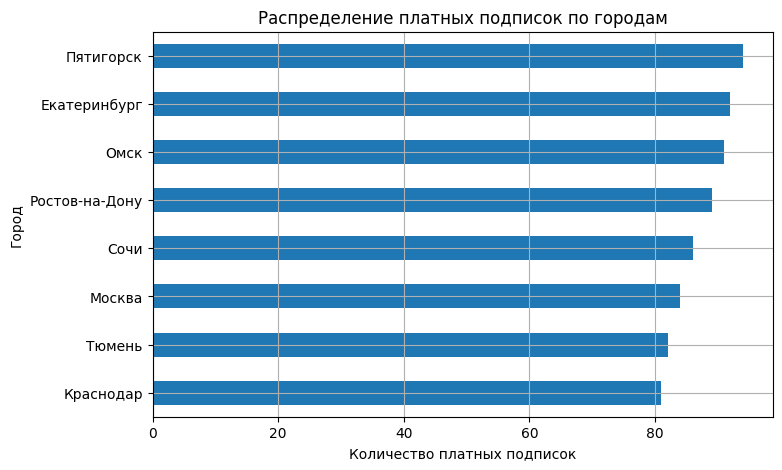

In [23]:
users_ultra_query.groupby('city')['subscription_type'].count().sort_values(ascending=True).plot(kind='barh',figsize=(8,5), grid=True)
plt.title('Распределение платных подписок по городам')
plt.xlabel('Количество платных подписок')
plt.ylabel('Город')
plt.show()

In [24]:
users_grouped = users.groupby(['user_id'])[['city', 'subscription_type']].apply(sum).sort_values(by='subscription_type', ascending=True)
users_free_query = users_grouped.query('subscription_type == "free"')
free_group = users_free_query.groupby('city')['subscription_type'].count().sort_values(ascending=False)
display(free_group)

city
Пятигорск         125
Екатеринбург      112
Краснодар         112
Ростов-на-Дону    109
Сочи              103
Тюмень             98
Омск               92
Москва             84
Name: subscription_type, dtype: int64

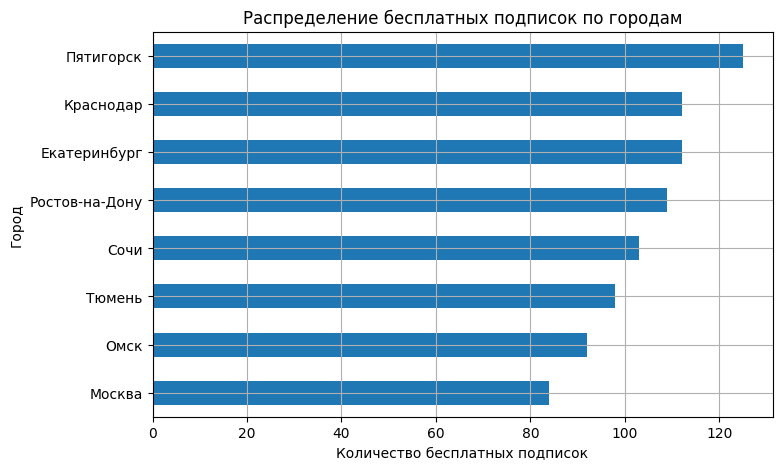

In [25]:
users_free_query.groupby('city')['subscription_type'].count().sort_values(ascending=True).plot(kind='barh',figsize=(8,5), grid=True)
plt.title('Распределение бесплатных подписок по городам')
plt.xlabel('Количество бесплатных подписок')
plt.ylabel('Город')
plt.show()

Пятигорск снова обгоняет остальные города - платными подписками пользуются 94 человека, бесплатными - 125.


Чуть меньше платных подписок в Екатеринбурге и Омске (92 и 91)


Меньше всего платных подписок в Тюмени и Краснодаре (82 и 81). 


Бесплатными подписками пользуются много пользователей из Екатеринбурга и Краснодара (112).


Меньше всего бесплатных подписок в Москве (84).

### Изучим возраст пользователей

In [26]:
users['age'].value_counts().head(8)

age
25    145
24    132
26    131
23    129
22    119
27    119
28    112
21     93
Name: count, dtype: int64

In [27]:
users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

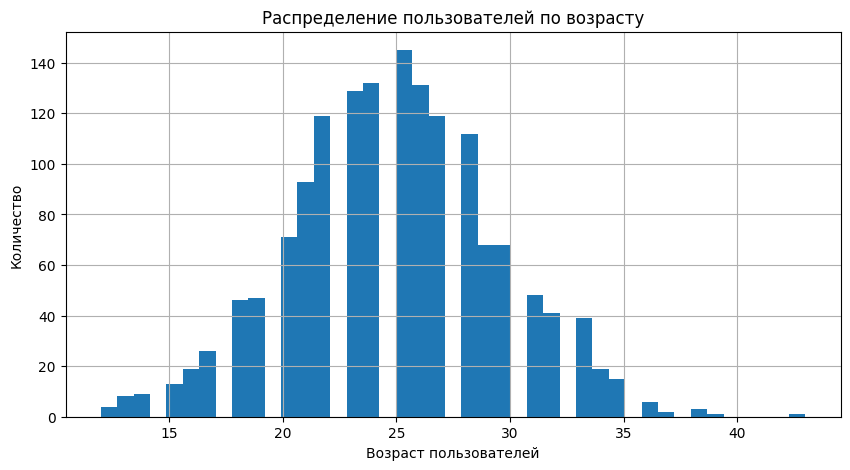

In [28]:
users['age'].hist(figsize=(10,5), bins = users['age'].max())
plt.title('Распределение пользователей по возрасту')
plt.xlabel('Возраст пользователей')
plt.ylabel('Количество')
plt.show()

Возраст пользователей: 12-43 года. 

Наиболее "активные" пользователи в диапазоне 22-28 лет. 


Лидирующая позиция у 25-летних.

25 лет также являются медианой датафрейма. Среднее значение 24.9, что говорит о нормальном распределении и минимальном количестве выбросов.

### Расстояние, которое пользователь преодолел за одну поездку

In [30]:
rides['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

Пользователи в среднем проезжают от 2.5 до 4 км (медиана 3134, среднее - 3071, разрыв небольшой). Наименьшее расстояние - 0.85 м (85 см). Похоже на выброс. 
Округлим значения и проверим этот столбец на минимальные значения и выбросы.

In [31]:
round(rides['distance'].sort_values(ascending=True), 2).head(10)

11555     0.86
9541      2.57
13690     4.33
8658      6.78
7841      7.10
8906     11.28
8324     12.23
13940    15.00
15626    15.37
11862    15.63
Name: distance, dtype: float64

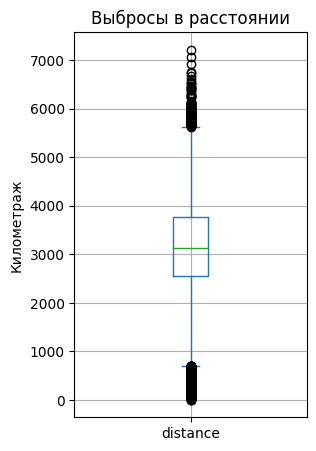

In [32]:
#визуализируем
rides.plot(y = 'distance', kind = 'box',grid=True, figsize=(3,5)); 
plt.title('Выбросы в расстоянии')
plt.ylabel('Километраж')
plt.show()

Наблюдаем большое количество выбросов сверху, что является допустимым, поскольку пользователи преодолевают разное расстояние. 


Выбросы снизу имеют очень маленькие значения, от 85 см до, например, 7 м.

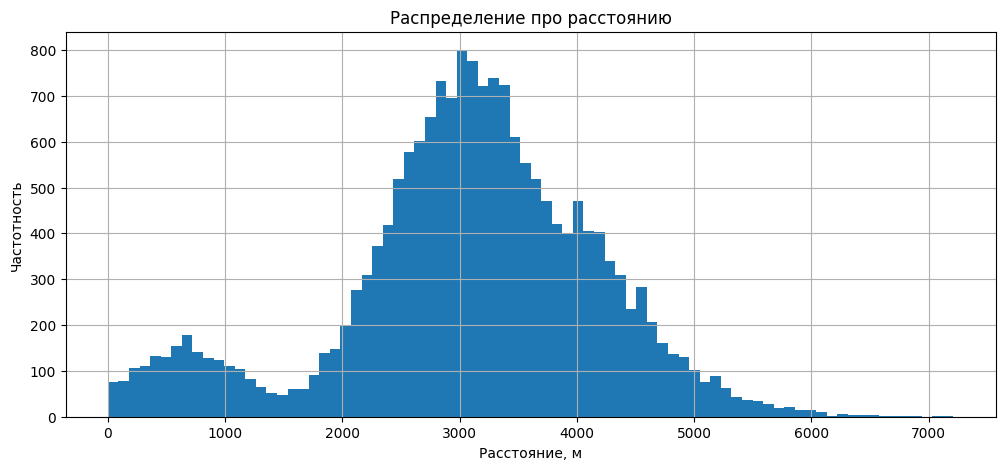

In [33]:
#визуализируем 
rides['distance'].hist(figsize=(12,5), bins = 80)
plt.title('Распределение про расстоянию')
plt.xlabel('Расстояние, м')
plt.ylabel('Частотность')
plt.show()

Посмотрим на самые большие расстояния 

In [34]:
rides['distance'].sort_values(ascending=False)

16309    7211.007745
16484    7066.003772
15580    6908.491343
17171    6760.940067
17242    6724.932981
            ...     
7841        7.097072
8658        6.784447
13690       4.329506
9541        2.570787
11555       0.855683
Name: distance, Length: 18068, dtype: float64

Самое маленькое расстояние - 0.85 м


Самое большое расстояние - 7.2 км.

### Продолжительность поездок

In [35]:
rides['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

Длительность поездки в среднем составляет 14-22 минуты. Минимальное значение - 30 сек, что странно, и, скорее всего коррелирует с минимальным значениям по расстоянию. Максимальное значение - 41 мин. Медиана - 17.6, среднее - 17.8, разрыв небольшой, нормальное распределение.  
Округлим значения и проверим этот столбец на минимальные значения и выбросы.

In [36]:
round(rides['duration'].sort_values(ascending=True), 2).head(5)

12013    0.5
17314    0.5
15029    0.5
7437     0.5
12967    0.5
Name: duration, dtype: float64

Значений в 0.5 мин в датасете очень много, посмотрим на значения в целом

In [37]:
round(rides['duration'].sort_values(ascending=True), 2).value_counts().head(10)

duration
0.50     95
15.96    22
16.30    21
14.19    21
18.57    20
18.31    20
17.84    20
17.34    20
18.61    20
15.99    20
Name: count, dtype: int64

Text(0, 0.5, 'Частотность')

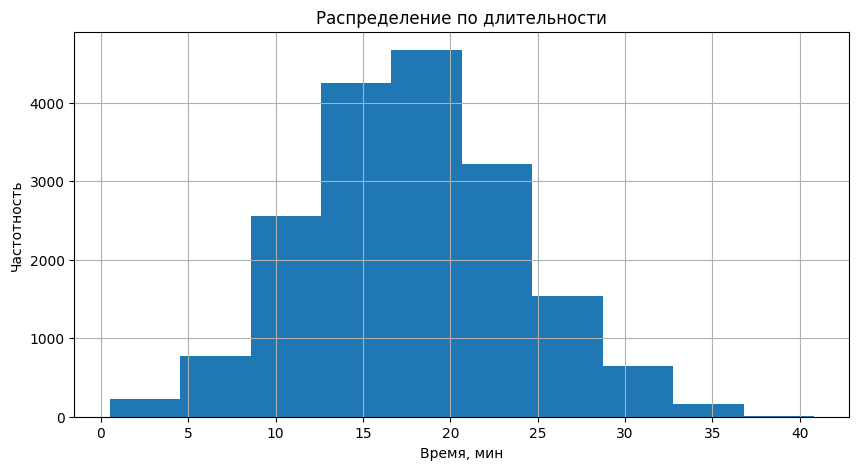

In [38]:
rides['duration'].hist(figsize=(10,5))
plt.title('Распределение по длительности')
plt.xlabel('Время, мин')
plt.ylabel('Частотность')

Действительно, очень маленьких значений много.

Посмотрим, как по пользователям распределено суммарное расстояние и длительность поездки

In [39]:
rides_sum = rides.groupby(['user_id'])[['distance', 'duration']].apply(sum).sort_values(by=['distance'], ascending=False)
rides_sum.describe()

,distance,duration
count,1534.000000,1534.000000
mean,36167.330144,209.713782
std,13118.521744,73.717086
min,5530.344048,34.157765
25%,26391.076407,156.744972
50%,35494.886400,205.399853
75%,44789.726858,258.638565
max,79325.846482,446.233013


Среднее расстояние - 35 км. 


В среднем от 26 до 45 км.


Минимум - 5.5 км.


Максимум - 79.3.км. 
________________________________


Средняя длительность - 205 мин. 


В среднем от 157 до 259 мин.


Минимумм - 34 мин.


Максимум - 446 мин.

#### Месяцы

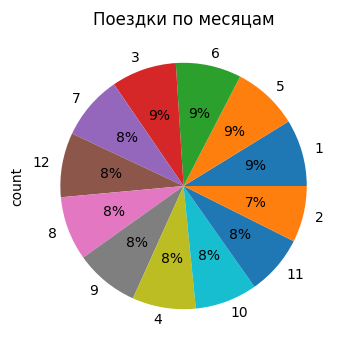

In [40]:
#посмотрим распределение по месяцам
rides['month'].value_counts().plot(
    kind = 'pie', 
    y = rides['month'],
    autopct = '%1.0f%%',
    figsize=(4,4), 
    title = 'Поездки по месяцам');

Данные по месяцам распределены равномерно, от 7% до 9%

### Вывод

Для анализа были представлены 3 набора данных сервиса аренды самокатов GoFast о некоторых пользователях и их поездках из нескольких городов. Чтобы провести исследовательский анализ данных, была проведена покдобработка данных, для удобства анализа был добавлен столбец ‘month’. 

Изучены:
* возраст пользователей (12-43 года, наиболее активные пользователи в возрасте 22-28 лет, самые многочисленные - 25 лет)
* города (8 городов: Пятигорск, Екатеринбург, Ростов-на-Дону, Краснодар, Сочи, Омск, Тюмень, Москва). Наибольшее количество пользователей из Пятигорска, наименьшее - из Москвы. 
* расстояние, которое проезжают пользователи (2.5-4 км, наименьшее расстояние - 0.85 м, наибольшее - 7.2 км). 
* длительность поездки (14-22 минуты, минимальное значение - 30 секунд, максимальное значение - 41 минута. 
* разница в количестве поездок по месяцам (равномерное распределение, 7-9%). 
* типы подписок (бесплатных 835, платных - 699). 

Для анализа представлены данные 1534 пользователей. Основной возраст пользователей - 22-28 лет, максимальный - 41, минимальный - 12. Медиана - 25 (самый многочисленный показатель) => сервисом пользуются люди всех возрастов: и подростки, и молодежь, и взрослые. 


Пользователи проживают в 8 городах: Краснодар, Ростов-на-Дону, Екатеринбург, Пятигорск, Москва, Тюмень, Омск, Сочи - города, представляющие разные округи страны. Процентное распределение равномерное, 11-14% от общего числа. Больше всего сервисом пользуются пользователи из Пятигорска, меньше всего - из Москвы. 


В среднем пользователи проезжают на самокатах от 2.5 до 4 км. Однако присутствуют и «странные» данные: 0.85 м, 2.57  м, 4.33 м и т.п. Эти расстояния слишком малы для проезда на самокате. Хорошо бы разобраться в причине. Возможно, пользователи передумали, а возможно, в самокате была техническая неисправность или он был разряжен. 


Самое большое расстояние - 7.2 км.
                        

Длительность поездки в среднем составляет 14-22 минуты. Минимальное значение - 30 секунд (также есть подозрительные значения, которые, скорее всего, коррелируют с маленькими значениями по расстоянию и причинами). Максимальное значение - 41 минута, медиана - 17.8. 


Пользователи в среднем проезжают от 26 до 45 км за 157-269 минут (2.6-4.5 часов). Минимальный километраж, который проехал пользователь за 2021 год - 5.5 км. Максимальный - 79 км. 
Минимальное время, которое потратили на поездку - 34 минуты. Максимальное время - 446 минут (7.4 часов). 

Пользователи одинаково часто пользуются сервисом, независимо от месяца или времени года. 

Пользователи пользуются бесплатной и платной подпиской. Бесплатной подпиской пользуется большее количество человек - 835, ультрой пользуются 699 человек (54% против 46%). Больше всего подписками ультра пользуются в Пятигорске, Екатеринбурге и Омске. Меньше всего в Тюмени и Краснодаре. 
Бесплатных подписок также больше всего в Пятигорске - 125. Меньше всего в Москве - 84.

## Объединение данных

**Объединим все таблицы в одну**

In [41]:
full = users.merge(rides)
full = full.merge(subs)
full


,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


**Создадим таблицу с пользователями с бесплатной подпиской**

In [42]:
free_subs = full.query('subscription_type == "free"')
free_subs


,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


**Создадим таблицу с пользователями с подпиской ультра**

In [43]:
ultra_subs = full.query('subscription_type == "ultra"')
ultra_subs


,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,Оксана,22,Москва,ultra,3973.046497,24.671163,2021-08-29,8,6,0,199
6496,699,Оксана,22,Москва,ultra,3288.702563,15.892886,2021-09-12,9,6,0,199
6497,699,Оксана,22,Москва,ultra,3076.159348,14.389525,2021-09-26,9,6,0,199
6498,699,Оксана,22,Москва,ultra,4707.845501,15.839579,2021-10-17,10,6,0,199


**Совместим обе таблицы на графике**

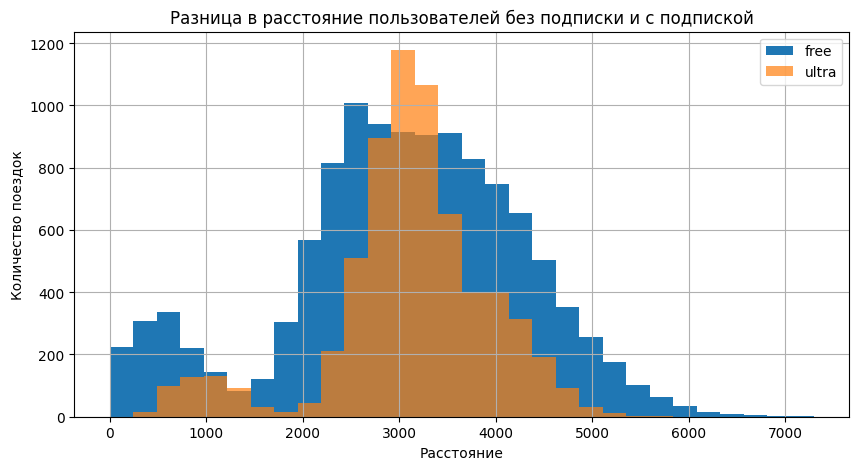

In [44]:
free_subs['distance'].hist(bins=30, range = (0, 7300), figsize=(10,5), grid=True, label='free')
ultra_subs['distance'].hist(bins=30, range = (0, 7300), figsize=(10,5), grid=True, alpha=0.7, label='ultra')
plt.title('Разница в расстояние пользователей без подписки и с подпиской')
plt.xlabel('Расстояние')
plt.ylabel('Количество поездок')
plt.legend()
plt.show()

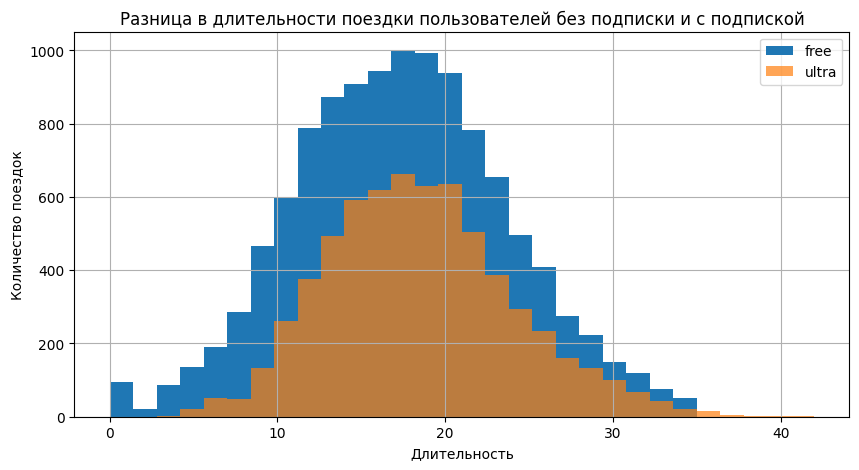

In [45]:
free_subs['duration'].hist(bins=30, range = (0, 42), figsize=(10,5), grid=True, label='free')
ultra_subs['duration'].hist(bins=30, range = (0, 42), figsize=(10,5), grid=True, alpha=0.7, label='ultra')
plt.title('Разница в длительности поездки пользователей без подписки и с подпиской')
plt.xlabel('Длительность')
plt.ylabel('Количество поездок')
plt.legend()
plt.show()

### Вывод
Все датасеты были смещены в одну таблицу, была получена общая картина.


Таблица была разделена на две: пользователи с бесплатной подпиской и пользователи с ультрой.


В первую таблицу вошло 11568 строк, во вторую - 6500, разница более чем в 1.5 раза.

Из общего графика распределения по расстоянию можно заметить, что тенденция у обеих гистограмм одинаковая, однако бесплатники чаще преодолевают короткие расстояния - от 1 до ~2.7 км, а также большие расстояния - от ~3.4 до 7 км.


Пик пользователей ультры приходится на 3.4 км. Пик превышает максимальное значение бесплатников практически на 200 поездок.  


Скорее всего, бесплатной подпиской пользуются "случайные" пользователи. Пользователи ультра, скорее всего, пользуются самокатами на постоянной основе.



Из общего графика распределения по длительности поездки можно заметить, что тенденция у обеих гистограмм также одинаковая, однако у бесплатников длительность поездок превышает по частотности длительность поездки пользователей ультры. 


Они совершают больше коротких поездок, менее 5 мин. Чаще всего их поездка занимает от ~15 до 20 мин. Максимальное время около 35 минут, таких значений мало.  


Пользователи с платной подпиской редко используют самокат менее 10 мин. Чаще всего их поездка также занимает от ~15 до 20 минут. Максимальное время поездки достигает 35-40 минут, однако таких поездок достаточно мало.

## Подсчёт выручки

Создадим аггрегированную таблицу

In [46]:
full['duration'] = np.ceil(full['duration']) #округлим длительность

df_agg = pd.pivot_table(full, index=['user_id','month'], 
                            values = ['distance', 'duration', 'name', 'subscription_type', 'minute_price', 'start_ride_price', 'subscription_fee'], 
                            aggfunc = {'distance': sum, 
                                      'duration' : sum,
                                      'name' : len, 
                                      'subscription_type' : min,
                                      'minute_price' : min,
                                      'start_ride_price' : min,
                                      'subscription_fee' : min})
df_agg.rename(columns = {'name' : 'rides_numb'}, inplace = True) #переименуем столбец name для подсчета поездок
df_agg['distance'] = round(df_agg['distance'] * 0.001, 2) #переведем расстояние в киллометры, округлим до двух знаков
df_agg

distance  duration  minute_price  rides_numb  start_ride_price  \
user_id month                                                                   
1       1          7.03      42.0             6           2                 0   
        4          0.75       7.0             6           1                 0   
        8          6.72      46.0             6           2                 0   
        10         5.81      32.0             6           2                 0   
        11         7.00      56.0             6           3                 0   
...                 ...       ...           ...         ...               ...   
1534    6          3.41      26.0             8           2                50   
        8          7.62      48.0             8           2                50   
        9          4.93      23.0             8           1                50   
        11        13.35      78.0             8           4                50   
        12         2.37      16.0             8           1                50   

               subscription_fee subscription_type  
user_id month                                      
1       1                   199             ultra  
        4                   199             ultra  
        8                   199             ultra  
        10                  199             ultra  
        11                  199             ultra  
...                         ...               ...  
1534    6                     0              free  
        8                     0              free  
        9                     0              free  
        11                    0              free  
        12                    0              free  

[11331 rows x 7 columns]

**Посчитаем помесячную выручку от каждого пользователя**

Помесячная выручка считается по формуле: 

(стоимость старта поездки ×  количество поездок) **+** 

стоимость одной минуты поездки **x**

общая продолжительность всех поездок в минутах) **+**

стоимость подписки.

Добавим столбец с помесячной выручкой в таблицу

In [47]:
df_agg['revenue_per_month'] = df_agg['minute_price'] * df_agg['duration'] + df_agg['start_ride_price'] * df_agg['rides_numb']+ df_agg['subscription_fee']
df_agg

distance  duration  minute_price  rides_numb  start_ride_price  \
user_id month                                                                   
1       1          7.03      42.0             6           2                 0   
        4          0.75       7.0             6           1                 0   
        8          6.72      46.0             6           2                 0   
        10         5.81      32.0             6           2                 0   
        11         7.00      56.0             6           3                 0   
...                 ...       ...           ...         ...               ...   
1534    6          3.41      26.0             8           2                50   
        8          7.62      48.0             8           2                50   
        9          4.93      23.0             8           1                50   
        11        13.35      78.0             8           4                50   
        12         2.37      16.0             8           1                50   

               subscription_fee subscription_type  revenue_per_month  
user_id month                                                         
1       1                   199             ultra              451.0  
        4                   199             ultra              241.0  
        8                   199             ultra              475.0  
        10                  199             ultra              391.0  
        11                  199             ultra              535.0  
...                         ...               ...                ...  
1534    6                     0              free              308.0  
        8                     0              free              484.0  
        9                     0              free              234.0  
        11                    0              free              824.0  
        12                    0              free              178.0  

[11331 rows x 8 columns]

In [48]:
df_agg.sort_values(by='revenue_per_month', ascending=False).head(10)

,,distance,duration,minute_price,rides_numb,start_ride_price,subscription_fee,subscription_type,revenue_per_month
user_id,month,,,,,,,,
1471,1,23.10,143.0,8,6,50,0,free,1444.0
1083,5,23.43,129.0,8,7,50,0,free,1382.0
715,12,22.71,131.0,8,6,50,0,free,1348.0
1424,4,21.53,124.0,8,7,50,0,free,1342.0
1383,1,20.65,123.0,8,6,50,0,free,1284.0
1196,3,17.99,121.0,8,6,50,0,free,1268.0
938,5,19.06,111.0,8,6,50,0,free,1188.0
1149,12,18.45,116.0,8,5,50,0,free,1178.0
991,3,18.24,113.0,8,5,50,0,free,1154.0


In [49]:
# Код ревьюера
print(df_agg.groupby('subscription_type')['revenue_per_month'].mean())

print(len(df_agg))

subscription_type
free     328.641365
ultra    362.792191
Name: revenue_per_month, dtype: float64
11331


In [50]:
df_agg.sort_values(by='revenue_per_month', ascending=False).tail(10)

distance  duration  minute_price  rides_numb  start_ride_price  \
user_id month                                                                   
896     10         5.47       1.0             8           1                50   
893     3          4.76       1.0             8           1                50   
704     10         4.83       1.0             8           1                50   
1041    2          4.60       1.0             8           1                50   
713     2          5.22       1.0             8           1                50   
1444    8          5.83       1.0             8           1                50   
718     2          5.20       1.0             8           1                50   
1224    7          6.41       1.0             8           1                50   
        1          4.43       1.0             8           1                50   
1243    12         5.10       1.0             8           1                50   

               subscription_fee subscription_type  revenue_per_month  
user_id month                                                         
896     10                    0              free               58.0  
893     3                     0              free               58.0  
704     10                    0              free               58.0  
1041    2                     0              free               58.0  
713     2                     0              free               58.0  
1444    8                     0              free               58.0  
718     2                     0              free               58.0  
1224    7                     0              free               58.0  
        1                     0              free               58.0  
1243    12                    0              free               58.0

Наибольшую и наименьшую выручку принесли пользователи без подписки. Наибольшая выручка: 1480 за месяц (январь).
Наименьшая выручка: 58.

## Проверка гипотез

### Важно понять, тратят ли пользователи с подпиской больше времени на поездки? 
Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

**Гипотеза:** пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки =>


H_0: Время пользователей ультры = время бесплатников


H_1: Время пользователей ультры > время бесплатников

In [51]:
ultra_dur = ultra_subs['duration'] 
free_dur = free_subs['duration']

results = st.ttest_ind(ultra_dur, 
                       free_dur,
                       alternative = 'greater')
alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

1.2804098316645613e-34
Отвергаем нулевую гипотезу


**Отвергаем гипотезу о равенстве времени подписчиков с подпиской и без**

### Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?

Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Проверьте гипотезу и сделайте выводы.

H_0: Расстояние одной поездки по подписке равно 3130


H_1: Расстояние одной поездки по подписке > 3130

In [52]:
ultra_dis = ultra_subs['distance'] 

value = 3130

results = st.ttest_1samp(ultra_dis, 
                       value,
                       alternative = 'greater')
alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

0.9195368847849785
Не удалось отвергнуть нулевую гипотезу


Расстояние может быть выше оптимального, что приведет к повышенному износу самоката. 
Повышенный износ = повышенные расстраты на восстановление/закупку самокатов. **Но мы не можем утверждать, что расстояние превышает 3130**

### Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. 

H_0: Выручка от пользователей ультры = выручка от пользователей без подписки

H_1: Выручка от пользователей ультры > выручка от пользователей без подписки

In [53]:
df_ultra_month = df_agg.query('subscription_type == "ultra" ') 
df_free_month = df_agg.query('subscription_type == "free" ') 

ultra_month = df_ultra_month['revenue_per_month']
free_month = df_free_month['revenue_per_month'] 


results = st.ttest_ind(ultra_month, 
                       free_month,
                       alternative = 'greater')
alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

1.8850394384715216e-31
Отвергаем нулевую гипотезу


**Не можем утверждать, что выручка пользователей с подпиской равна выручке от пользователей без подписки**

## Заключение

Для исследования были **загружены** 3 набора данных сервиса аренды самокатов GoFast: информация о пользователях, информация о поездках и информация о подписках. Изучили содержание данных, исследовали на пропуски (пропуски не были обнаружены), изменили тип данных столбца date в датафрейме rides на to_datetime.


**Подготовили данные** для дальнейшего анализа: удалили 31 дубликат в датафрейме users, добавили новый столбец 'month' с информацией о месяце поездки в датафрейм rides. 


Провели **исследовательский анализ данных**

Были зучены:
* возраст пользователей: 


 Основной возраст пользователей - 22-28 лет, максимальный - 41, минимальный - 12. Медиана - 25 (самый многочисленный показатель) => сервисом пользуются люди всех возрастов: и подростки, и молодежь, и взрослые. 

* города:


Пользователи проживают в 8 городах: Краснодар, Ростов-на-Дону, Екатеринбург, Пятигорск, Москва, Тюмень, Омск, Сочи - города, представляющие разные округи страны. Процентное распределение равномерное, 11-14% от общего числа. Больше всего сервисом пользуются пользователи из Пятигорска, меньше всего - из Москвы. 


* расстояние, которое проезжают пользователи:


В среднем пользователи проезжают на самокатах от 2.5 до 4 км. Однако присутствуют и «странные» данные: 0.85 м, 2.57  м, 4.33 м и т.п. Эти расстояния слишком малы для проезда на самокате. Хорошо бы разобраться в причине. Возможно, пользователи передумали, а возможно, в самокате была техническая неисправность или он был разряжен. Самое большое расстояние - 7.2 км.


* длительность поездки: 


Длительность поездки в среднем составляет 14-22 минуты. Минимальное значение - 30 секунд (также есть подозрительные значения, которые, скорее всего, коррелируют с маленькими значениями по расстоянию и причинами). Максимальное значение - 41 минута, медиана - 17.8. 


Пользователи в среднем проезжают от 26 до 45 км за 157-269 минут (2.6-4.5 часов). Минимальный километраж, который проехал пользователь за 2021 год - 5.5 км. Максимальный - 79 км. 
Минимальное время, которое потратили на поездку - 34 минуты. Максимальное время - 446 минут (7.4 часов). 


* разница в количестве поездок по месяцам:


Пользователи одинаково часто пользуются сервисом, независимо от месяца или времени года. 


* типы подписок (бесплатных 835, платных - 699). 


Пользователи пользуются бесплатной и платной подпиской. Бесплатной подпиской пользуется большее количество человек - 835, ультрой пользуются 699 человек (54% против 46%). Больше всего подписками ультра пользуются в Пятигорске, Екатеринбурге и Омске. Меньше всего в Тюмени и Краснодаре. 
Бесплатных подписок также больше всего в Пятигорске - 125. Меньше всего в Москве - 84.


Для дальнейшего анализа все таблицы были объединены в одну.


Подсчитали выручку. Наибольшую и наименьшую выручку принесли пользователи без подписки. Наибольшая выручка: 1480 за месяц (январь). Наименьшая выручка: 58.

Проверили ряд гипотез:


1) Пользователи с подпиской тратят больше времени на поездки, чем пользователи на бесплатном тарифе 


- не смогли отвергнуть гипотезу о том, что пользователи с подпиской и без подписки тратят одинаковое количество времени на поездки; если пользователи с бесплатной подпиской тратят больше времени, то они могут принести больше выгоды, поскольку их минута дороже. Плюс, пользователи ультры могут гарантированно занять самокаты, которые бы могли взять бесплатники, которые проезжают большее расстояние. Поэтому нужно обеспечить бесплатников возможностью занять самокат. 


2) Пользователи с подпиской проезжают расстояние, не превышающее 3130 метров за одну поездку


- не смогли отвергнуть эту гипотезу; если пользователи ультры проезжают расстояние равное 3130 или меньше, то они выигрывают за счет сохранения самокатов, и экономят деньги на ремонт самоката. Нужно сопоставить стоимость ремонта самоката с прибылью от пользователей с обоими видами подписок, вычесть из прибыли и посмотреть, сколько денег приходит от обеих групп в итоге. 



3) Помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки


- не смогли подтвердить эту гипотезу; нужно провести сопоставление с учетом износа.


**Вывод**: пользователи с платной подпиской не являются более выгодными для компании, потому что выручка будет сопоставима: пользователи без подписки ездят больше и дольше, их минута и стартовый взнос - дороже, соответственно, они принесут больше денег, но они больше влияют на износ самокатов, чем пользователи с подпиской. 